# $H_{\beta}$ broad component width
In this notebook we want to find a way to group our sample of type I AGNs according to the width of their $H_{\beta}$ broad component. Stacking the spectra of the groups will allow us to measure the narrow $H_{\beta}$ which is hard to do for individual spectra. <br> 

We are working with 3 surveys - Spiders, XXL, and Strip82X. The numbers of type I AGNs in each are:
1. Spiders - 8302,
2. XXL - 1787,
3. Stripe82X - 1271. <br>

** For the Spiders survey we have catalog line measurements, including $H_{\beta}$ broad component.** We can use this measurement and continue to get the relation between the broad and narrow line as a function of redshift, **based on spiders objects only.** If we want to use XXL, and Stripe82X objects as well, we can use the method of ordering the objects according to the flux ratio at different velocities from the $H_{\beta}$ line center. In this notebook we will see how this method compares to the measured $H_{\beta}$ broad component values.

### Redshift bins:
In this notebook we still do not consider separating the objects to redshift bins, we will do this after deciding on a method for grouping them according to the width of the $H_{\beta}$ broad component.

# Things I think I understand but will be happy if Dalya can confirm :)
1. the reason we are grouping the objects according to the broad $H_{\beta}$ width and stacking the spectra is because it is very difficult to measure the **narrow** $H_{\beta}$ for individual spectra. It wouldn't make sense to do this in order to get a better measurement of the **broad** $H_{\beta}$, right?

# Questions:
1. X-ray questions: Why are we using only X-ray selected type I AGNs? All three surveys we are working with contain X-ray selected AGNs, so why is the distribution of type I and type II AGNs are different between them? In spiders only ~200 out of ~8000 are type II, while in XXL it's ~300 out of ~2000
2. What is the difference between Quasars and BLAGNs in the spiders catlaog, and which ones do we want to use? See [Object Classes](#object_classes).

In [108]:
import pandas
import numpy
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

%matplotlib notebook

def get_order(X):
    
    X_order = numpy.zeros(X.shape[0])
    X_order[numpy.argsort(X)] = numpy.arange(X.shape[0])
    
    X_order = X_order.astype(float)
    X_order[numpy.isnan(X)] = numpy.nan
    X_order[X == 0] = numpy.nan
    
    return X_order

def reorder_spectra_mat(spectra_matrix, indecies_to_plot, order_by):
    nof_objects = len(indecies_to_plot)
    if len(order_by) > nof_objects:
        order_by = order_by[indecies_to_plot]
    order = numpy.argsort(order_by)
    spectra_matrix = spectra_matrix[indecies_to_plot]

    plot_matrix = spectra_matrix[order]
    return plot_matrix


def ladder_plot_smooth(CW, spectra_matrix, indecies_to_plot, order_by, nof_spectra, delta=1):
    plot_matrix = reorder_spectra_mat(spectra_matrix.copy(), indecies_to_plot, order_by)

    n_groups = nof_spectra
    l = int(len(indecies_to_plot) / n_groups) * n_groups
    groups = numpy.split(plot_matrix[:l], n_groups)
    plt.figure(figsize = (10,5))
    lw = 1
    for g_idx, g in enumerate(groups):
        d = delta * g_idx
        x_plt = numpy.nanmedian(g, axis=0)
        plt.plot(CW, x_plt + d - numpy.nanmedian(x_plt), c=cmap(g_idx / (n_groups-1)), alpha = 0.9, lw = lw)
        plt.xlim([4730,5070])
        plt.xlabel(r'$\lambda [\AA]$', fontsize = 20)
        plt.ylabel('Normalized flux', fontsize = 20)
        plt.xticks([4750, 4850, 4950, 5050], fontsize = 20)
        plt.yticks([])
        plt.tight_layout()

    plt.show()
    return

def print_sdss_link(plate, mjd, fiber):
    print('http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate={}&mjd={}&fiber={}'.format(plate, mjd, fiber))
    return

In [2]:
hdul = fits.open('data/spiders_quasar_bhmass-DR14.fits')
hdul.info()
data_tbl = Table(hdul[1].data)
spiders_df = data_tbl.to_pandas()
del(hdul)
del(data_tbl)
spiders_df.head()

Filename: data/spiders_quasar_bhmass-DR14.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      16   (8661,)   uint8   
  1  Joined      BinTableHDU    352   8570R x 170C   [5A, 23A, D, D, E, E, D, D, D, D, D, D, D, I, J, I, 7A, D, D, D, 6A, I, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


,xray_detection,name,RA,DEC,ExpTime,ExiML_2RXS,DETML_XMMSL,f_2RXS,errf_2RXS,fden_2RXS,...,logBHMVP_hb,errlogBHMVP_hb,logBHMMD_hb,errlogBHMMD_hb,logBHMA_hb,errlogBHMA_hb,l_edd1,l_edd2,edd_ratio1,edd_ratio2
0,2RXS,2RXS J131703.4-021538,199.26434,-2.26066,273.859985,161.0,-99.0,8.035261e-12,7.752275e-13,2.811901e-30,...,6.778126,0.082026,6.288811,0.082846,6.717432,0.082175,NaN,7.799543e+44,NaN,0.006164
1,2RXS,2RXS J130358.4+534748,195.99369,53.79679,505.869995,273.0,-99.0,8.729714e-13,3.046346e-13,3.318945e-31,...,7.750659,0.060184,7.374837,0.060549,7.710600,0.060250,NaN,7.321536e+45,NaN,0.007065
2,2RXS,2RXS J160951.4+490216,242.46435,49.03793,535.039978,266.0,-99.0,1.409289e-12,3.086196e-13,5.069907e-31,...,6.893677,0.096619,6.542989,0.096997,6.858188,0.096688,NaN,1.017701e+45,NaN,0.086011
3,2RXS,2RXS J081517.7+460431,123.82380,46.07529,463.630005,61.0,-99.0,4.602566e-12,6.818868e-13,1.625549e-30,...,7.158066,0.110853,6.823838,0.111148,7.125570,0.110907,NaN,1.870724e+45,NaN,0.066039
4,2RXS,2RXS J160519.8+520726,241.33253,52.12398,547.679993,95.0,-99.0,8.669619e-13,2.706654e-13,3.243396e-31,...,7.229066,0.078857,6.829267,0.079705,7.184648,0.079011,NaN,2.202975e+45,NaN,0.014213


<a id="object_classes"></a>
# Object classes
 Question: this catalog classifies objects as BLAGNs, NLAGNs, and Quasars. Which ones do we take (for the narrow lines - broad lines correlation)? Is the difference only in luminosity?
### For now taking BLAGNs and Quasras. 
* NLAGN - 268 objects
* QSO - 4721 objects
* BLAGN - 3581 objects

In [3]:
numpy.unique(spiders_df['CLASS_BEST'], return_counts = True)

(array(['BLAGN ', 'NLAGN ', 'QSO   '], dtype=object),
 array([3581,  268, 4721]))

In [4]:
spiders_BLAGN_df = spiders_df[ (spiders_df['CLASS_BEST'] == 'BLAGN ') | (spiders_df['CLASS_BEST'] == 'QSO   ')].copy()
spiders_BLAGN_df.shape

(8302, 170)

# Redshift distribution:

* Dalya: which redshift is this? 
* Answer: the redshift is taken from the spiders catalog. The description in the catalog reads: "Source redshift based on the visual inspection results." (see https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/spiders_quasar_bhmass.html)

<IPython.core.display.Javascript object>


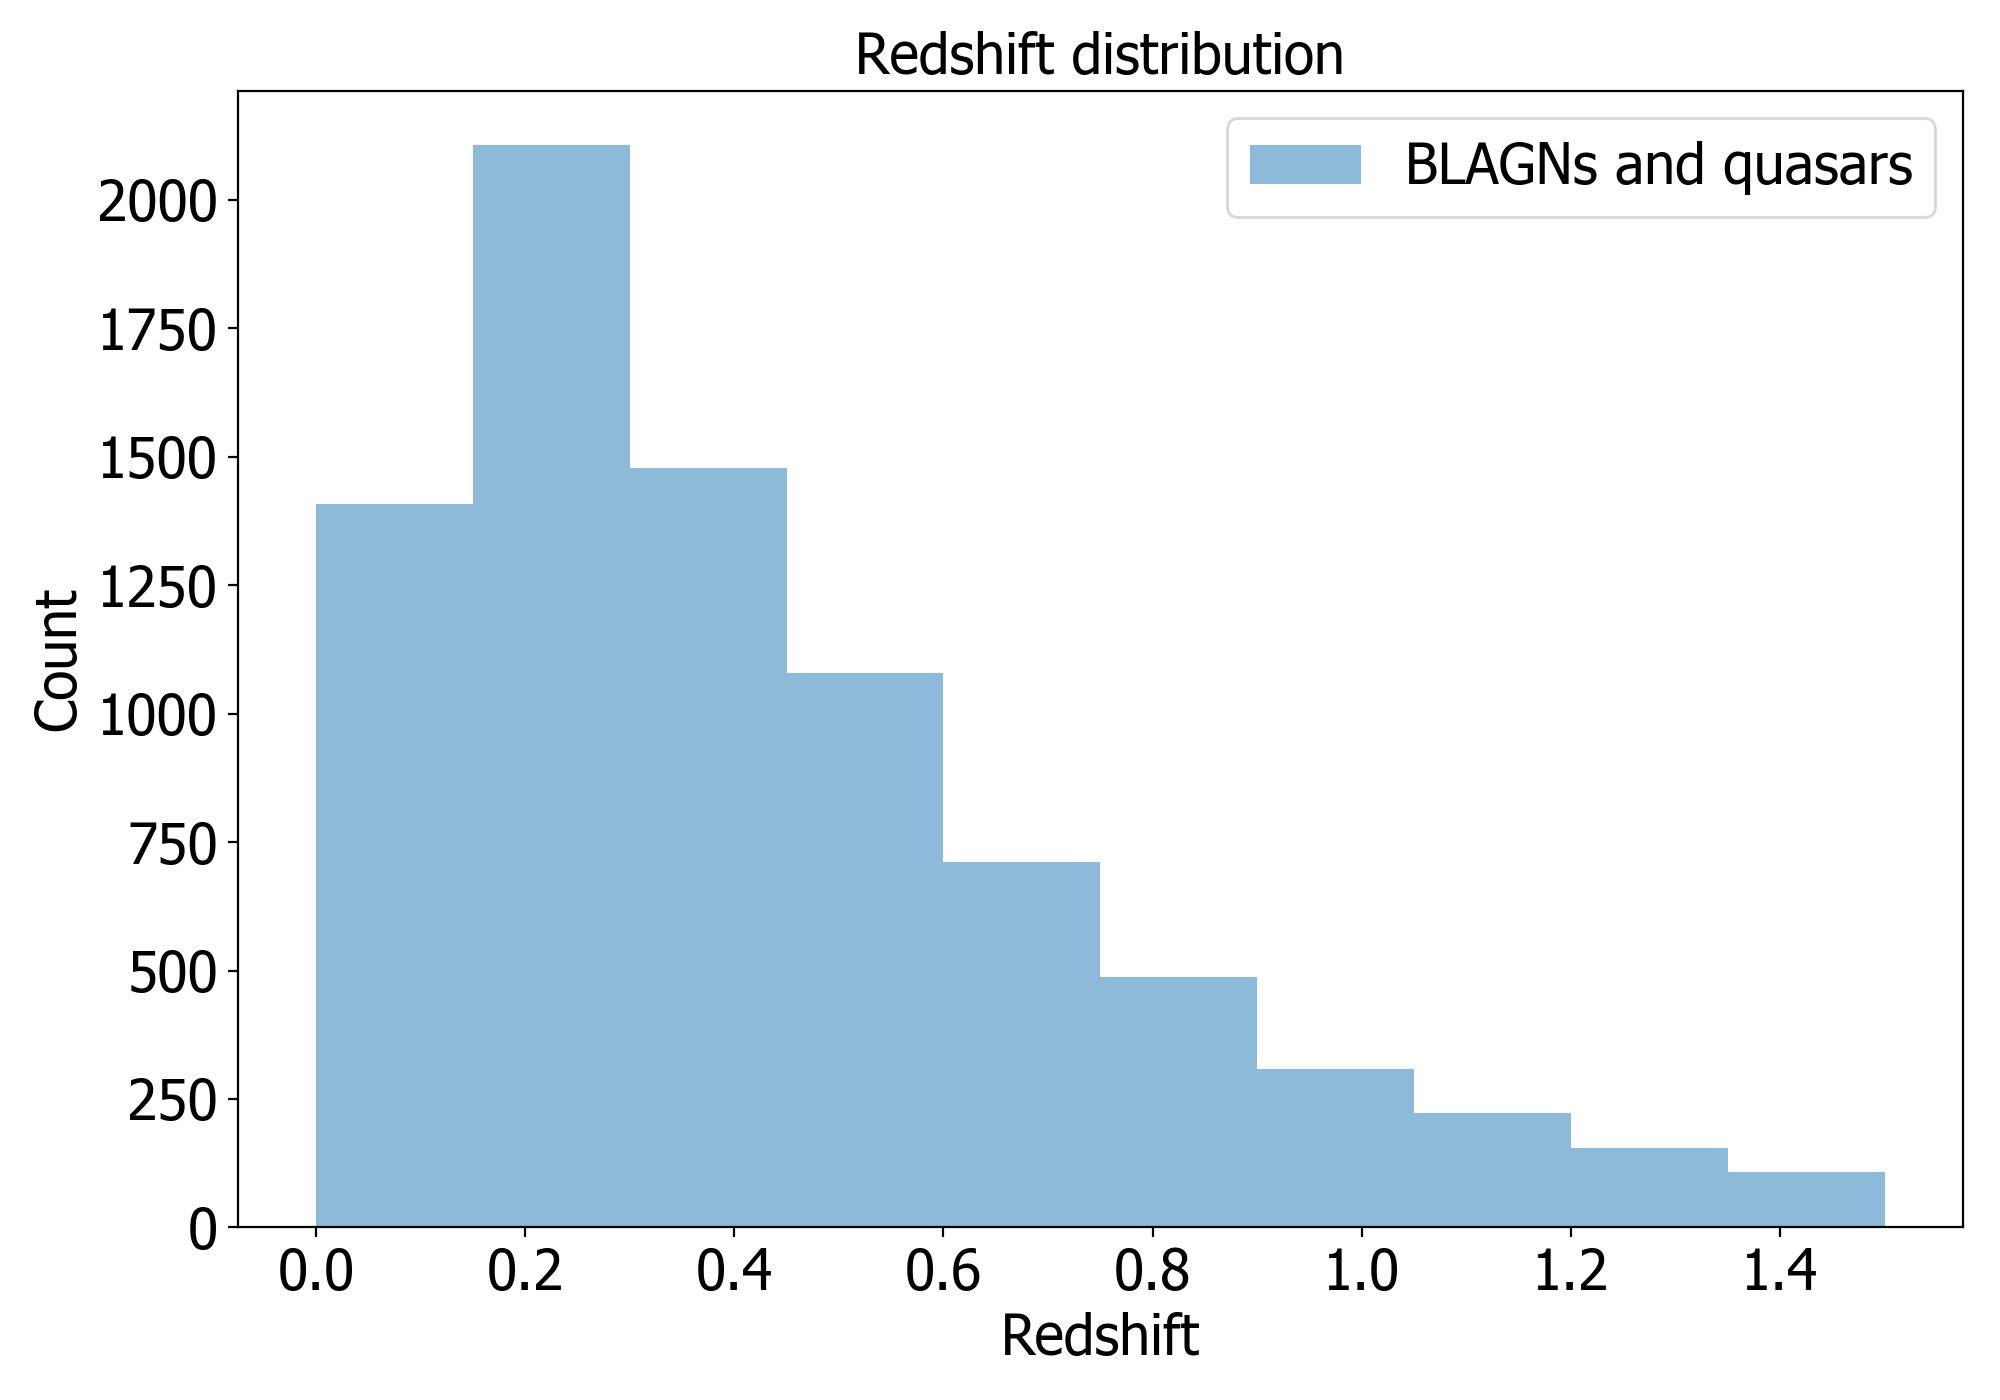

In [225]:
plt.figure(figsize = (10,7))
plt.title('Redshift distribution', fontsize = 20)
plt.hist(spiders_BLAGN_df['redshift'], range = [0,1.5], alpha = 0.5, label = 'BLAGNs and quasars', log=False)
plt.xlabel('Redshift', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

In addition, let's look at the redshift distribution of the AGNs we have from the other surveys: We can see that while there are less objects in these surveys, the objects have higher redshifts. So it might be important to keep them if we want to get more objects at high redshifts. <br>


<img src="redshift_stripe82x_4.png">
<img src="redshift_xxl_4.png">


# Load spectra:

In [9]:
if False:
    import prepro
    import load_data
    from joblib import Parallel, delayed

    ##################################################
    ##################################################
    ####### Load spectra from SDSS fits files ########
    ##################################################
    ##################################################
    run2d_fixed = []
    for run2d in spiders_BLAGN_df['DR14_RUN2D'].values:
        run2d_fixed += [run2d.strip()]
    spiders_BLAGN_df['run2d'] = run2d_fixed
    spiders_BLAGN_df['run2d'] 
    specobj_identifiers = spiders_BLAGN_df[['name', 'plate', 'MJD', 'fiberID', 'run2d']].astype(str).values

    res = Parallel(n_jobs=-1)(delayed(load_data.single_object_load)(object_id)
                                for i, object_id in enumerate(specobj_identifiers))

    res = numpy.vstack(res)
    res = numpy.array_split(res, 4, axis=1)
    waves = res[0]
    specs = res[1]
    ivars = res[2]
    skies = res[3]

    del(res); del(ivars); del(skies)
    
    ##################################################
    ##################################################
    #######           De- Redshift            ########
    ##################################################
    ##################################################

    n_objects = spiders_BLAGN_df.shape[0]
    redshift = spiders_BLAGN_df['redshift'].astype(float).values
    waves_de_redshift = Parallel(n_jobs=-1)(delayed(prepro.de_redshift)(waves[i], redshift[i])
                                for i in range(n_objects))
    waves_de_redshift = numpy.vstack(waves_de_redshift)

    ##################################################
    ##################################################
    ####### Put on the same grid,             ########
    ####### take only h_beta and o_iii region ########
    ##################################################
    ##################################################
    
    w_start = numpy.argmax(waves_de_redshift[0] > 4600)
    w_end = numpy.argmax(waves_de_redshift[0] > 5200)
    wave = waves_de_redshift[0,w_start:w_end]

    reload(prepro)
    specs_hb_oiii = prepro.same_grid(wave, waves_de_redshift, specs)
    print(specs_hb_oiii.shape)
    numpy.save('specs_hb_oiii_spiders', [wave, specs_hb_oiii])
    
if True:
    import prepro
    wave, specs_hb_oiii = numpy.load('specs_hb_oiii_spiders.npy')
    wave_cont_flux, cont_flux = numpy.load('cont_flux.npy')
    cont_flux_hb_oiii = prepro.same_grid(wave, wave_cont_flux, cont_flux)
    n_objects = specs_hb_oiii.shape[0]
    print(specs_hb_oiii.shape)

Putting all spectra on the same grid with  lambda_max = 4600.25 and  lambda_min  = 5199.73
(8302, 533)


# $H_{\beta}$ broad component width
Our goal now is to find a way to group the objects according to the width of the $H_{\beta}$ broad component. We want to see if can can use the ratio of flux at different velocities from the line center to order the objects according to the line width of the broad component. <br> The first step is to remove the continuum flux. This is done by measuring the flux at different regions that are known to be emission line free, and interpolating. Here are a few examples of the result of the procedure:
<img src="ex1.png">
<img src="ex2.png">
<img src="ex3.png">
<img src="ex4.png">

In [37]:
specs_hb_oiii_normed = specs_hb_oiii - cont_flux_hb_oiii    
    
specs_hb_oiii_normed_plot = specs_hb_oiii -  cont_flux_hb_oiii
for i in range(n_objects):
    spec_norm = numpy.nansum(specs_hb_oiii_normed_plot[i,167:241])
    specs_hb_oiii_normed_plot[i] = (specs_hb_oiii_normed_plot[i] / spec_norm)

We calculate the flux in two velocity ranges:
1.   -5068 [km/s] < v < -965 [km/s]
2.   -965 [km/s] < v < 0 [km/s] <br>

and order the objects by the ratio. 

* We do not use objects for which it is not clear that the mean flux in the second region in higher than the flux in the first region. To get an error on the mean flux we use bootstrap, if the difference in mean flux between the two regions is not larger than  $3\sigma$ we put a nan value for the flux ratio. <br> 

* We only use the blue wing of the line. 

* We do not try to find the line center ourselves (doing this should improve the results a bit).

* We can also try to find the objects for which there is only a narrow line, with these flux ratios. I tried this and it did not effect the results much.

In [115]:
(wave[167] - wave[241] )/wave[241]*300000, (wave[167+60] - wave[241] )/wave[241]*300000

(-5068.4552639722824, -965.52909817546606)

In [224]:
from tqdm import trange
hb_flux_ratio = numpy.zeros(n_objects)
for i in trange(n_objects):
    s = specs_hb_oiii_normed[i,167:241].copy()
    vn_s = s[-5:]
    n_s = s[60:-5]
    b_s = s[:60]
   
    vn = numpy.nansum(vn_s)
    n = numpy.nansum(n_s)
    b = numpy.nansum(b_s)
    
    n_mean = n/len(n_s)
    
    n_bs = 25
    n_arr = numpy.zeros(n_bs)
    b_arr = numpy.zeros(n_bs)
    for bs_i in range(n_bs):
        orig = n_s
        n_s_bs = numpy.random.choice(orig, replace=True, size=int(len(orig)*0.75))
        orig = b_s
        b_s_bs = numpy.random.choice(orig, replace=True, size=int(len(orig)*0.75))

        n_arr[bs_i] = numpy.nansum(n_s_bs)
        b_arr[bs_i] = numpy.nansum(b_s_bs)
        
    bs_n_mean = numpy.mean(n_arr)/len(n_s)
    bs_n_mean_std = numpy.std(n_arr)/len(n_s)
    bs_b_mean = numpy.mean(b_arr)/len(b_s)
    bs_b_mean_std = numpy.std(b_arr)/len(b_s)
        
    if (b <= 0):
        hb_flux_ratio[i] = numpy.nan
    elif (n <= 0):
        hb_flux_ratio[i] = numpy.nan
    elif  (bs_n_mean - 3*bs_n_mean_std) < (bs_b_mean + 3*bs_b_mean_std):
        hb_flux_ratio[i] = numpy.nan
    else:
        #hb_flux_ratio[i] = (n-(vn - n_mean*len(vn_s) ))/(b+n)
        hb_flux_ratio[i] = n/(b+n)
    
numpy.isfinite(hb_flux_ratio).sum()   

100%|██████████| 8302/8302 [00:18<00:00, 442.19it/s]


6028

This is compared to **virialfwhm_hb: FWHM of the H beta broad line profile** from the spiders catalog.

In [ ]:
virialfwhm_hb = spiders_BLAGN_df['virialfwhm_hb'].values #FWHM of the H beta broad line profile.

We compare the ranking, as this is what we use for grouping the objects. There is a good correlation but it is clear that ordering the objects by the two measurements will result in somewhat different groups.

In [126]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


<IPython.core.display.Javascript object>


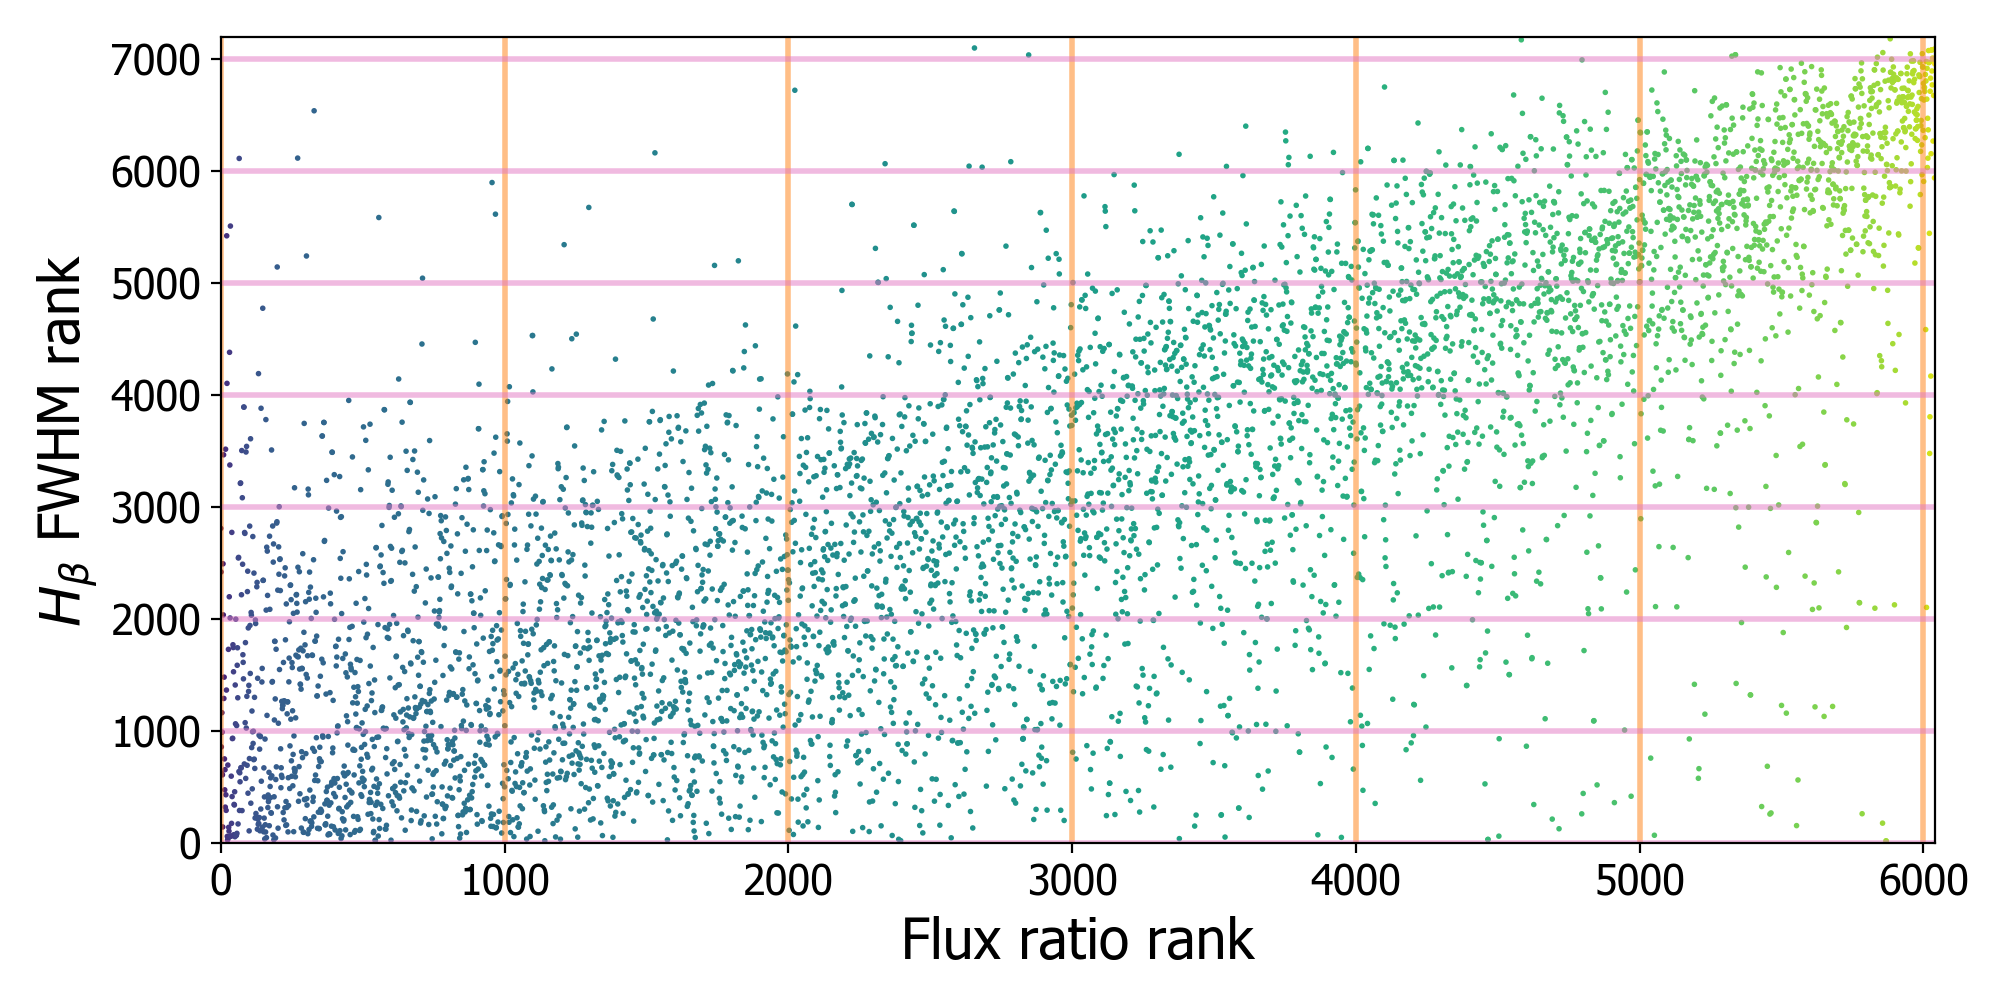

In [216]:
plt.figure(figsize = (10,5))
x = get_order(1/hb_flux_ratio)
y = get_order(virialfwhm_hb)
plt.scatter(x, y, s = 1, c = -numpy.log(hb_flux_ratio))
plt.ylabel(r'$H_{\beta}$ FWHM rank', fontsize = 20)
plt.xlabel('Flux ratio rank', fontsize = 20)
plt.xlim([0,numpy.nanmax(x)])
plt.ylim([0,numpy.nanmax(y)])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis='x', color = '#ff7f0e', lw = 2, alpha = 0.5)
plt.grid(axis='y', color = '#e377c2', lw = 2, alpha = 0.5)
plt.tight_layout()
plt.show()

The results of  grouping the objects according to both the flux ratio and *virialfwhm_hb* are shown below. The correlation of the broad $H_{\beta}$ and the narrow emission line ratio could be seen in both plots.

6041


<IPython.core.display.Javascript object>


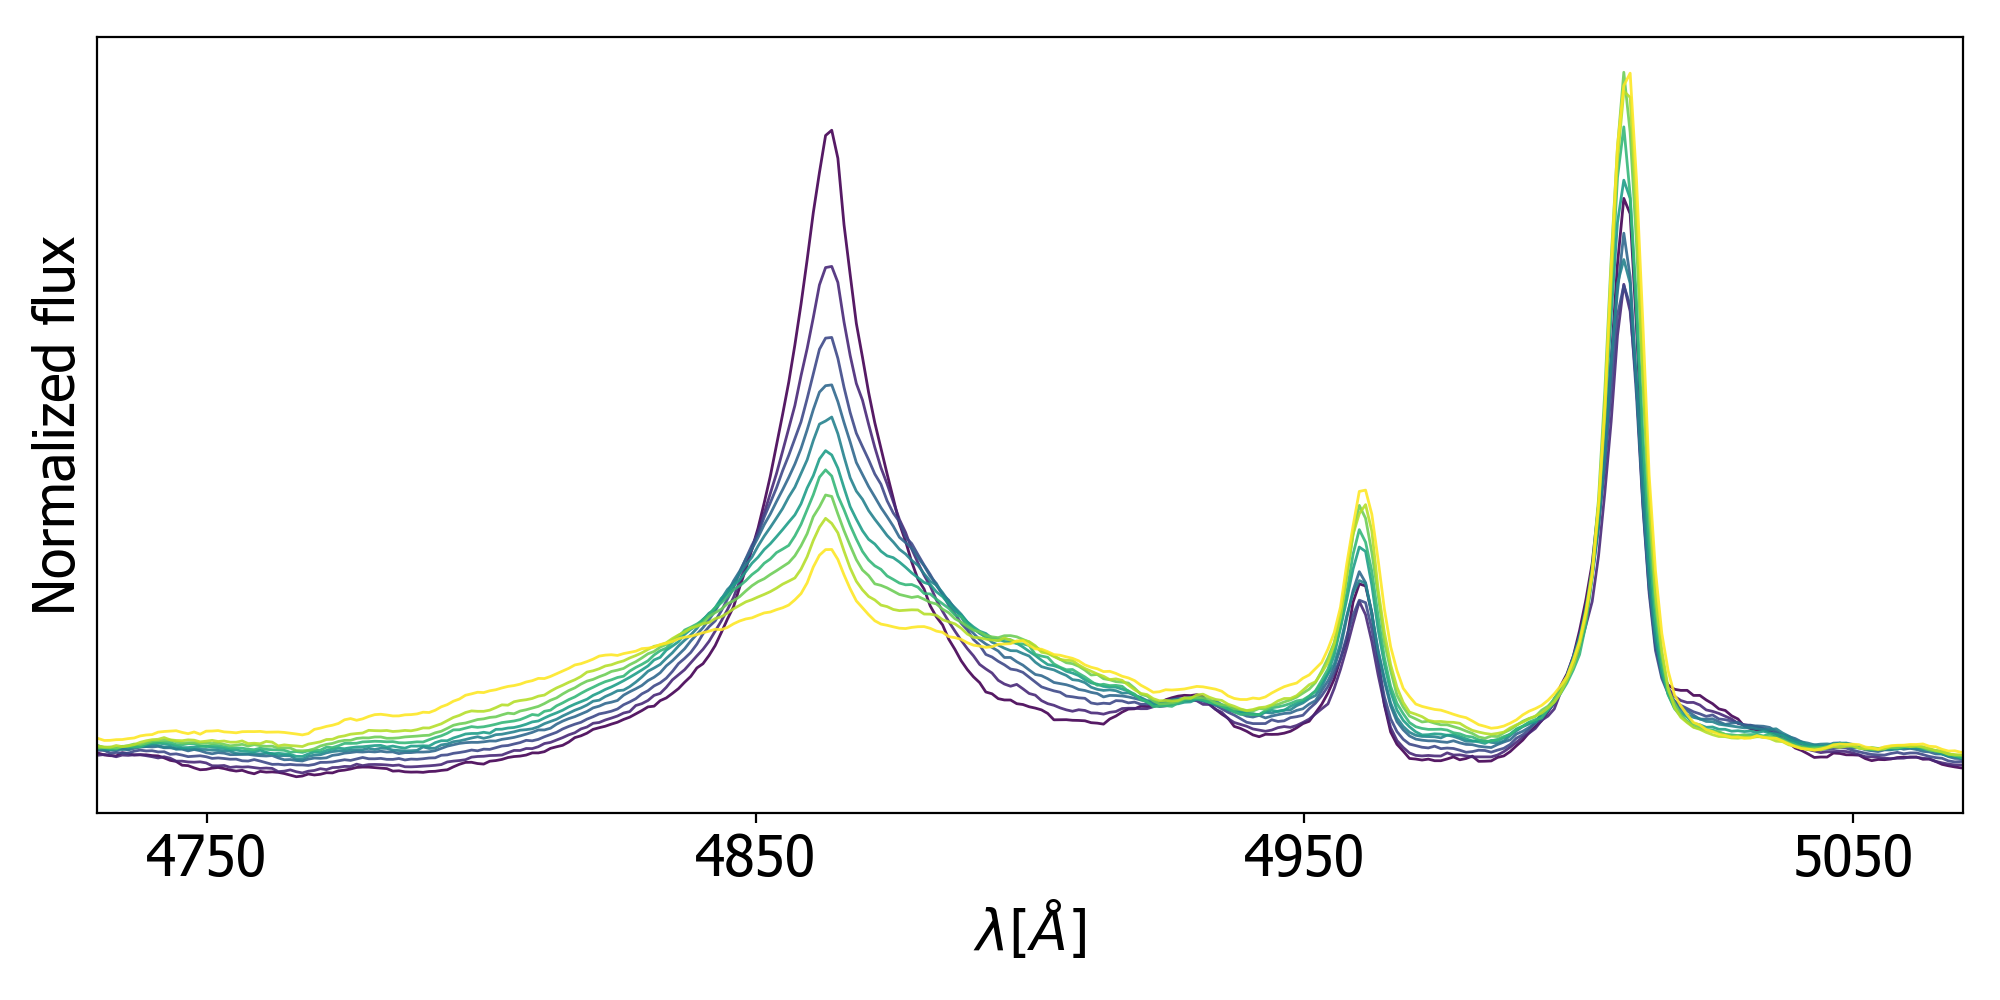

In [219]:
inds = numpy.where(numpy.isfinite(hb_flux_ratio))[0]
print(len(inds))
ladder_plot_smooth(wave, specs_hb_oiii_normed_plot.copy(), inds, 1/hb_flux_ratio, 10, delta=0)

7172


/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


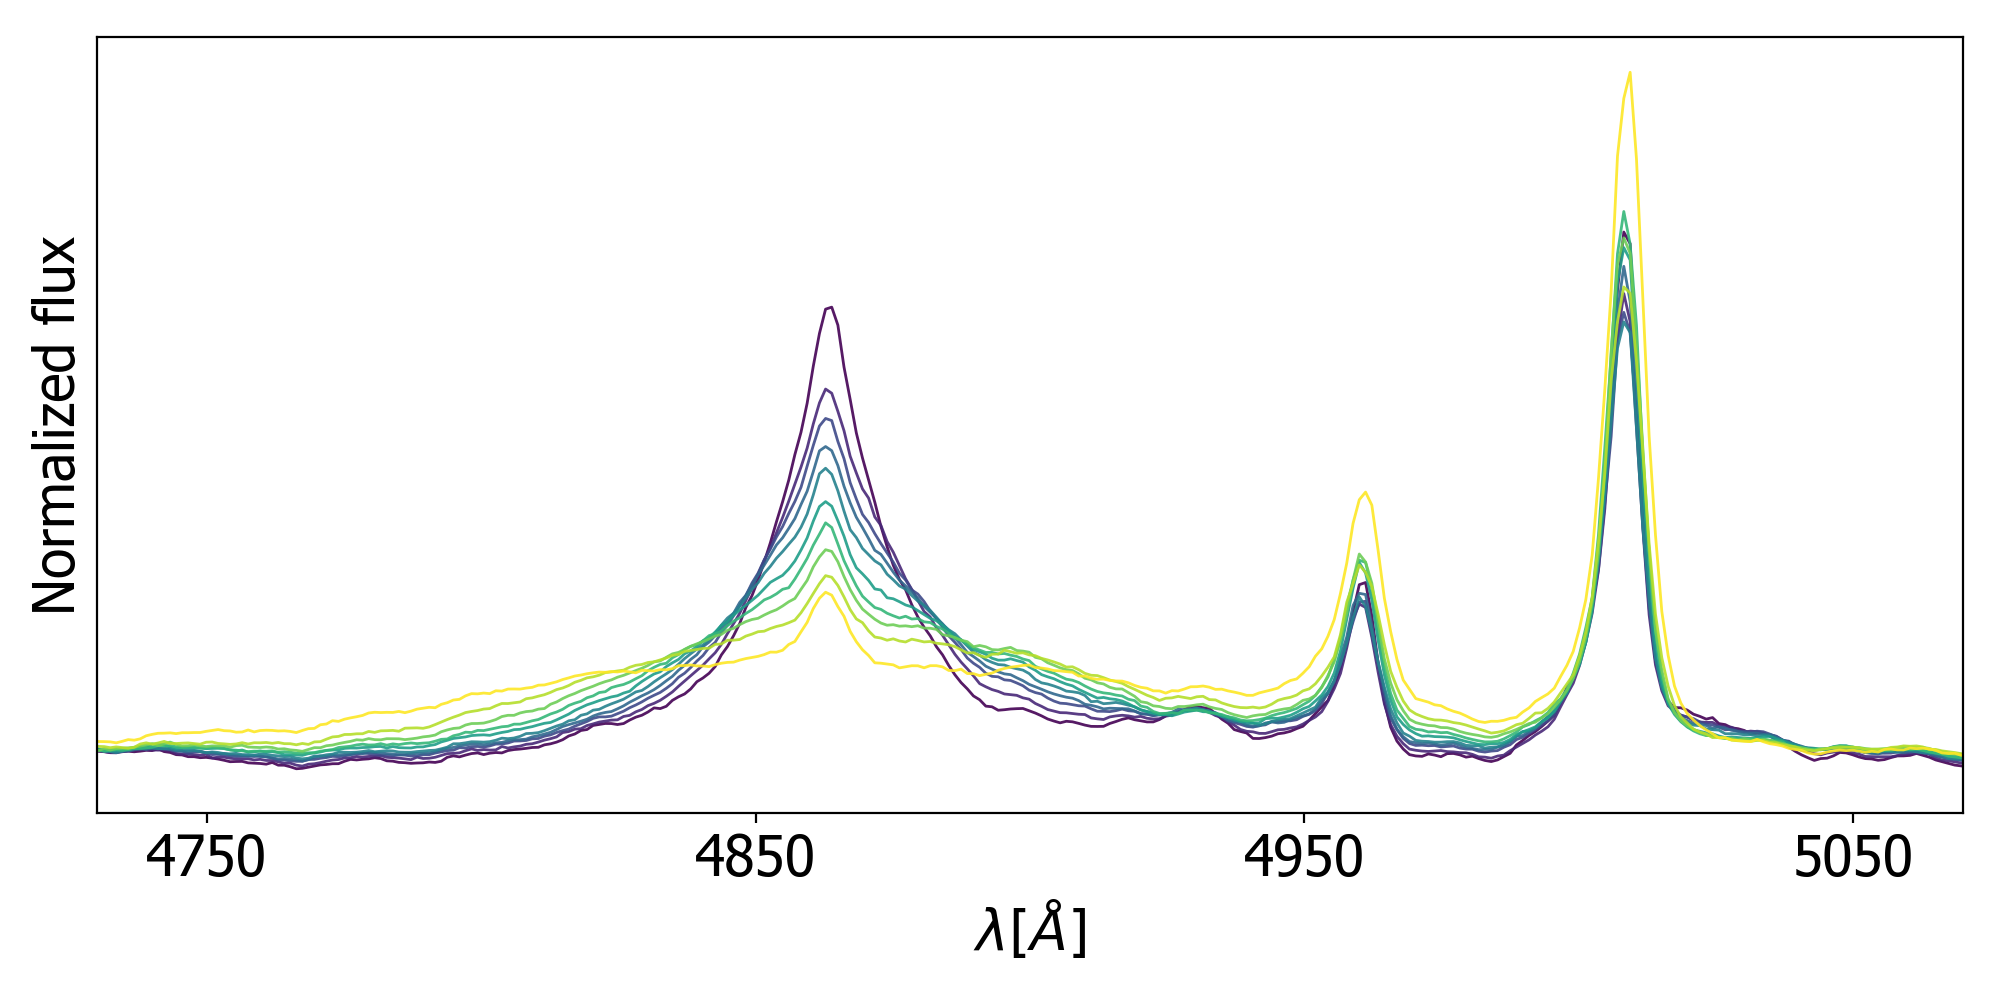

In [139]:
inds = numpy.where(numpy.isfinite(virialfwhm_hb) & (virialfwhm_hb > 0) )[0]
print(len(inds))
ladder_plot_smooth(wave, specs_hb_oiii_normed_plot.copy(), inds, virialfwhm_hb, 10, delta=0)

we can inspect individual objects for which the two measurements disagree. For example, the ones that are yellow according to *virialfwhm_hb*, but not yellow according to the flux ratio. From visually inspecting such objects this happens for 3 reasons:
1. Noisy spectra
2. Broad $H_{\beta}$ is shifted to the red
3. Incorrect *virialfwhm_hb*, as in the figure below <br>

In general, both methods make mistakes, we can improve the flux ratio method to take into account shifts in the line position. Not sure how much additional time we want to spend on this. Maybe we can take it one step further by fitting broad and narrow components to the staked spectra retrived by both methods, use bootstrap (in the stacking procedure) to estimate errors for that, and see where do we get a better error. Also, we can get a measure to the scatter around each stacked spectra, and see which one of the methods gives a smaller scatter.

In [183]:
numpy.where(( x < 4000) & (y < 6000) )[0][:10],# numpy.where(( x > 6000) & (y > 6000) )[0][:10]

/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


(array([ 207,  565,  646,  679, 2755, 3177, 4823, 4870, 5019, 5114]),)

flux ratio rank: 3141.00, virialfwhm_hb rank: 7032.00, virialfwhm_hb: 11852.75


<IPython.core.display.Javascript object>


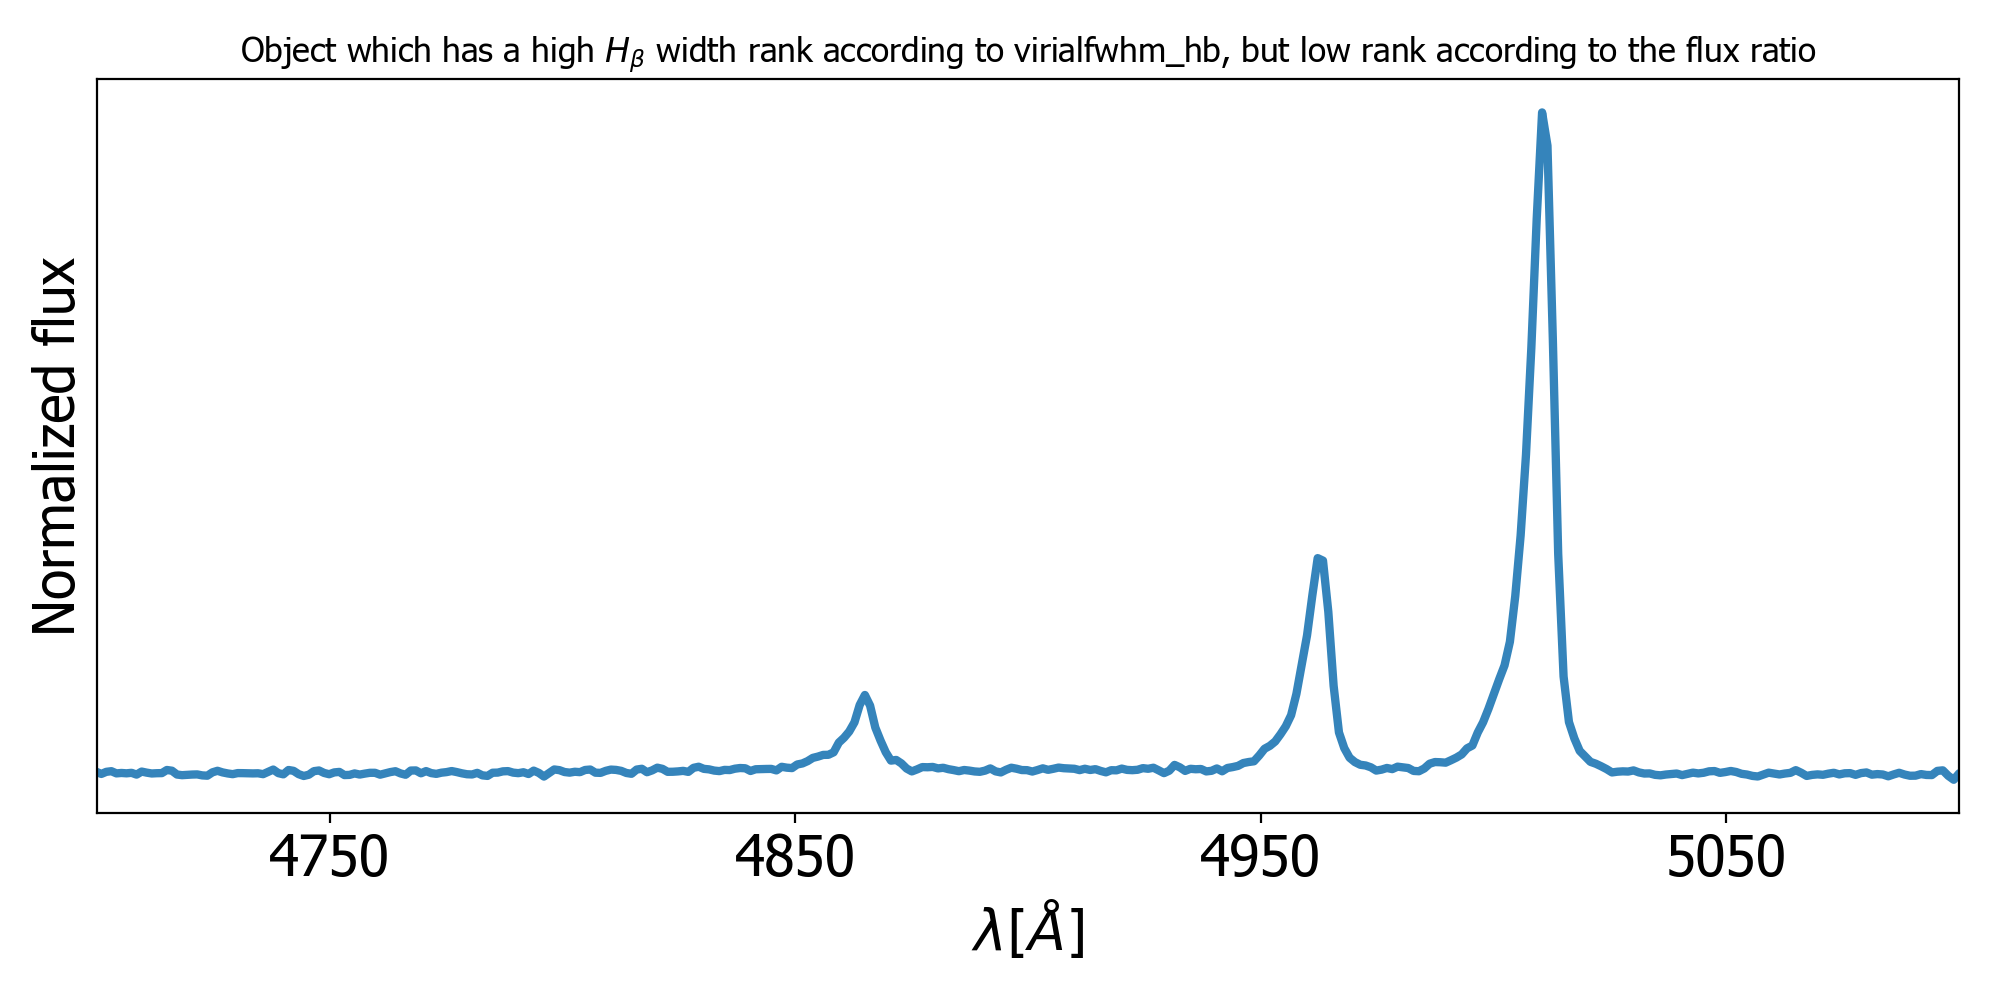

In [200]:
idx = 4870
print('flux ratio rank: {:.2f}, virialfwhm_hb rank: {:.2f}, virialfwhm_hb: {:.2f}' .format(x[idx], y[idx],  virialfwhm_hb[idx]))

plt.figure(figsize=(10,5))
lw = 3
plt.title(r'Object which has a high $H_{\beta}$ width rank according to virialfwhm_hb, but low rank according to the flux ratio')

#plt.plot(wave, specs_hb_oiii_normed_plot[idx], alpha = 0.9, lw = lw)
#idx = 112
#print('{:.2f}, {:.2f}, {:.2f}' .format(x[idx], y[idx],  virialfwhm_hb[idx]))

plt.plot(wave, specs_hb_oiii_normed_plot[idx], alpha = 0.9, lw = lw)
#plt.plot(wave, cont_flux_hb_oiii[idx], alpha = 0.9, lw = lw)

plt.xlim([4700,5100])
plt.xlabel(r'$\lambda [\AA]$', fontsize = 20)
plt.ylabel('Normalized flux', fontsize = 20)
plt.xticks([4750, 4850, 4950, 5050], fontsize = 20)
plt.yticks([])
plt.tight_layout()
plt.show()

In [197]:
numpy.where(( x > 6000) & (y < 5000) )[0][:10],# numpy.where(( x > 6000) & (y > 6000) )[0][:10]

/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


(array([ 774, 1118, 1783, 1794, 1808, 1828, 1846, 1938, 1991, 1999]),)

flux ratio rank: 6256.00, virialfwhm_hb rank: 2752.00, virialfwhm_hb: 3138.94


<IPython.core.display.Javascript object>


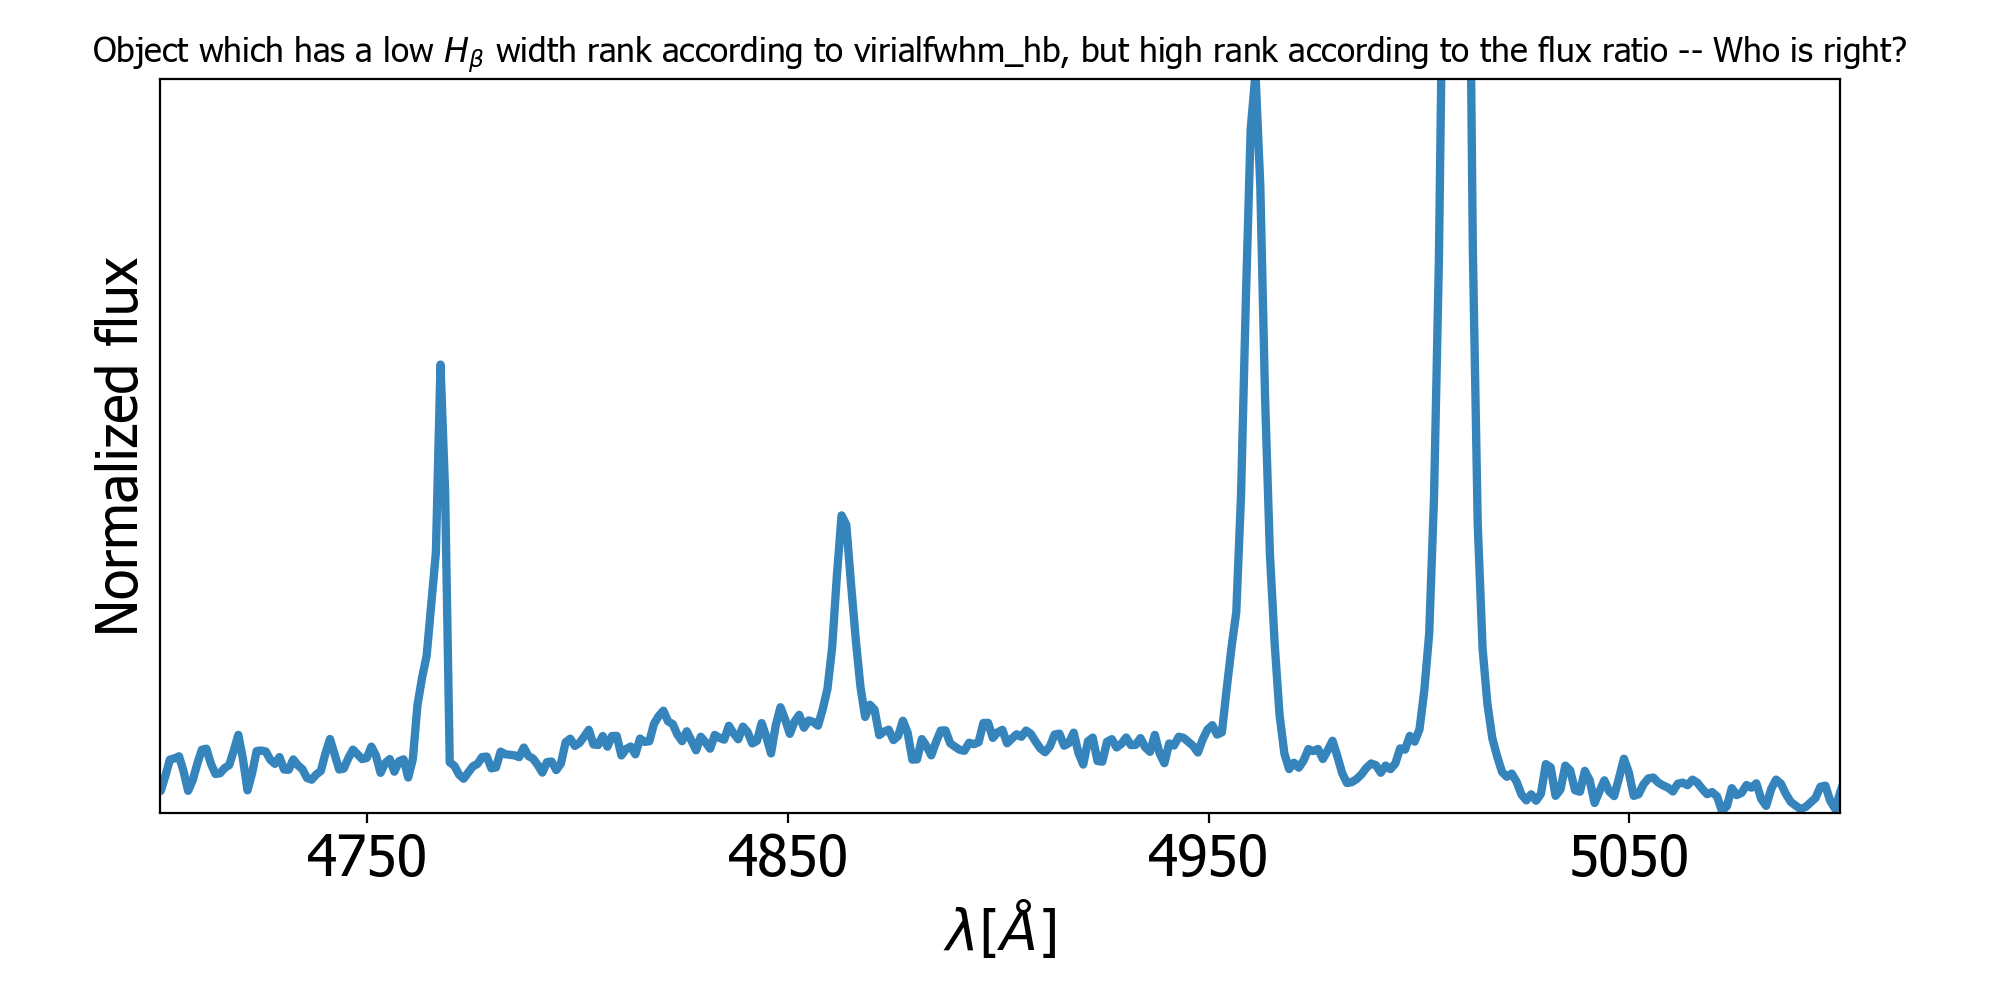

In [209]:
idx = 1118
print('flux ratio rank: {:.2f}, virialfwhm_hb rank: {:.2f}, virialfwhm_hb: {:.2f}' .format(x[idx], y[idx],  virialfwhm_hb[idx]))

plt.figure(figsize=(10,5))
lw = 3
plt.title(r'Object which has a low $H_{\beta}$ width rank according to virialfwhm_hb, but high rank according to the flux ratio -- Who is right?')
#plt.plot(wave, specs_hb_oiii_normed_plot[idx], alpha = 0.9, lw = lw)
#idx = 112
#print('{:.2f}, {:.2f}, {:.2f}' .format(x[idx], y[idx],  virialfwhm_hb[idx]))

plt.plot(wave, specs_hb_oiii_normed_plot[idx], alpha = 0.9, lw = lw)
#plt.plot(wave, cont_flux_hb_oiii[idx], alpha = 0.9, lw = lw)

plt.xlim([4700,5100])
plt.xlabel(r'$\lambda [\AA]$', fontsize = 20)
plt.ylabel('Normalized flux', fontsize = 20)
plt.xticks([4750, 4850, 4950, 5050], fontsize = 20)
plt.yticks([])
plt.tight_layout()
plt.show()